# 次元削除

## 線形判別分析 LDA(Linear Discriminant Analysis)

LDAはPCAと似た手法であるが、分類のラベルも用いて分析を行う点が異なる。  
よって、分類の特徴点抽出の手段としては一般的にはLDAのほうが優れている。  
(画像処理などの特定の場合にはPCAのほうが優れている場合もある。)

下記ではPCAと比較しながら、LDAの効果を確認していく。

### 線形判別分析 LDAの方法
1. d次元の元学習データの正規化を行う
2. クラスごとにd次元の平均ベクトルを計算する。iはクラス、dは次元を示す。
$$
m_i = \frac{1}{n_i} \sum x _i
$$
$$
m_i = \left[
\begin{matrix} \mu _{i, d1} \\ \mu _{i, d2} \\ \mu _{i, d3} \\ ・・・ \\ \mu _{i, dd} \end{matrix}
\right]
$$
3. 平均ベクトルを用いて、クラス間変動行列$S_B$とクラス内変動行列$S_W$を計算する。
$$
S_W = \sum_{i = 1}^{c}S_i
$$
$$
S_i = \sum (x - m_i)(x - m_i)^{T}
$$
 
$$
S_B = \sum _{i=1}^{c}n_i (m_i - m)(mi - m)^{T}
$$
  ここで、$m$はすべてのクラスのデータを対象にして計算した全体の平均値となる

4. 行列$S_W^{-1}S_B$の固有ベクトル、固有値を計算する
5. 固有値順にソートし、固有ベクトルをランク付けする
6. 固有値が大きい順に$k$個選択し、$d * k$の変換行列$W$を生成する
7. 変換行列$W$を用いて、d次元の元学習データをk次元のデータに射影する

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(iris.target_names)
#print("shape")
#print(iris['data'].shape)
#print("特徴量の確認")
#print(iris['data'][:5])

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']


データのサイズ数
(100, 2)


Text(0, 0.5, 'sepaal width (cm)')

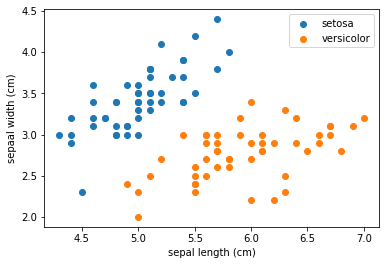

In [3]:
#簡単なサンプルにするためにデータを加工する
target_mask = iris['target'] != 2
feature_mask = [True, True, False, False]

X = iris.data[target_mask, :]  #ラベルがsetosa以外のデータのみ抽出
X = X[:, feature_mask]         #特徴量がsepal length, sepaal widthのみを抽出
print("データのサイズ数")
print(X.shape)
y = iris.target[target_mask]
target_names = iris.target_names[:2] 

plt.figure()
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepaal width (cm)')

(-3.0, 3.0)

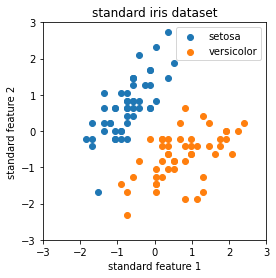

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

plt.figure(figsize=(4,4))
for i, target_name in enumerate(target_names):
    plt.scatter(X_std[y == i, 0], X_std[y == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('standard iris dataset')
plt.xlabel('standard feature 1')
plt.ylabel('standard feature 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [5]:
import pandas as pd
from sklearn.decomposition import PCA

n_components = 2  #分析後の主成分数

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_std, y)

元データと主成分変換を行ったPCA後のデータを表示すると下記のようになる。 


(-5.0, 5.0)

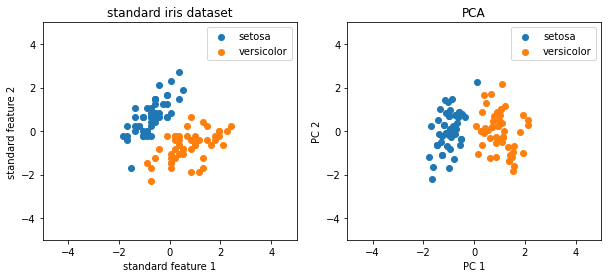

In [7]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
for i, target_name in enumerate(target_names):
    plt.scatter(X_std[y == i, 0], X_std[y == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('standard iris dataset')
plt.xlabel('standard feature 1')
plt.ylabel('standard feature 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

次にPCAの第一主成分におけるデータのヒストグラムと、LDA後の軸におけるデータのヒストグラムを表示する。

Text(0.5, 0, 'LDA 1')

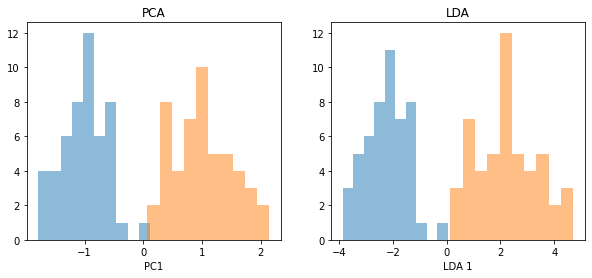

In [8]:
from scipy.stats import norm#標準偏差と平均値の導出で使う

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)

X_pca0 = X_pca[y == 0, 0]
X_pca1 = X_pca[y == 1, 0]
plt.hist(X_pca0, alpha=0.5)
plt.hist(X_pca1, alpha=0.5)
plt.title('PCA')
plt.xlabel('PC1')

plt.subplot(1, 2, 2)

X_lda0 = X_lda[y == 0]
X_lda1 = X_lda[y == 1]
plt.hist(X_lda0, alpha=0.5)
plt.hist(X_lda1, alpha=0.5)
plt.title('LDA')
plt.xlabel('LDA 1')

----------
# カーネルPCA

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(random_state=0)

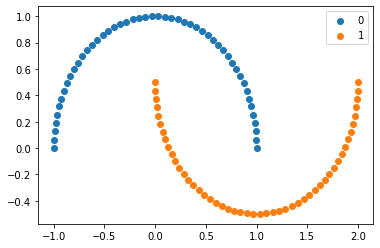

In [15]:
plt.figure()
for i in range(2):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [26]:
from sklearn.decomposition import KernelPCA
model = KernelPCA(n_components=2, kernel_params='rbf')
X_kpca = model.fit_transform(X)

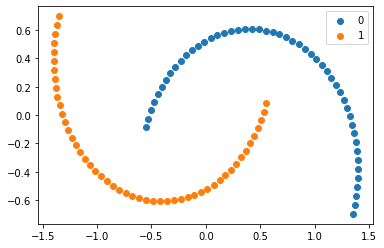

In [27]:
plt.figure()
for i in range(2):
    plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)